# 1.导论

什么是机器学习？机器学习的一个重要的目标就是利用数学模型来理解数据，发现数据中的规律，用作数据的分析和预测。数据通常由一组向量组成，这组向量中的每个向量都是一个样本，我们用$x_i$来表示一个样本，其中$i=1,2,3,...,N$,共N个样本，每个样本$x_i=(x_{i1},x_{i2},...,x_{ip},y_i)$共p+1个维度，前p个维度的每个维度我们称为一个特征，最后一个维度$y_i$我们称为因变量(响应变量)。特征用来描述影响因变量的因素，如：我们要探寻身高是否会影响体重的关系的时候，身高就是一个特征，体重就是一个因变量。通常在一个数据表dataframe里面，一行表示一个样本$x_i$，一列表示一个特征。      
根据数据是否有因变量，机器学习的任务可分为：**有监督学习**和**无监督学习**。
   - 有监督学习：给定某些特征去估计因变量，即因变量存在的时候，我们称这个机器学习任务为有监督学习。如：我们使用房间面积，房屋所在地区，环境等级等因素去预测某个地区的房价。          
   - 无监督学习：给定某些特征但不给定因变量，建模的目的是学习数据本身的结构和关系。如：我们给定某电商用户的基本信息和消费记录，通过观察数据中的哪些类型的用户彼此间的行为和属性类似，形成一个客群。注意，我们本身并不知道哪个用户属于哪个客群，即没有给定因变量。      

![jupyter](./1.1.png)        

根据因变量的是否连续，有监督学习又分为**回归**和**分类**：
   - 回归：因变量是连续型变量，如：房价，体重等。
   - 分类：因变量是离散型变量，如：是否患癌症，西瓜是好瓜还是坏瓜等。

为了更好地叙述后面的内容，我们对数据的形式作出如下约定：      
第i个样本：$x_i=(x_{i1},x_{i2},...,x_{ip},y_i)^T,i=1,2,...,N$     
因变量$y=(y_1,y_2,...,y_N)^T$        
第k个特征:$x^{(k)}=(x_{1k},x_{2k},...,x_{Nk})^T$     
特征矩阵$X=(x_1,x_2,...,x_N)^T$

在学习机器学习中，我们经常使用scikit-learn简称sklearn工具库来探索机器学习项目，下面我们开始使用sklearn来演示这几个具体的概念：

In [1]:
# 引入相关科学计算包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("ggplot")      
import seaborn as sns

## 1.1 回归

首先，我们先来看看有监督学习中回归的例子，我们使用sklearn内置数据集Boston房价数据集。sklearn中所有内置数据集都封装在datasets对象内：
返回的对象有：
   - data:特征X的矩阵(ndarray)
   - target:因变量的向量(ndarray)
   - feature_names:特征名称(ndarray)

In [2]:
from sklearn import datasets
boston = datasets.load_boston()     # 返回一个类似于字典的类
X = boston.data
y = boston.target
features = boston.feature_names
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


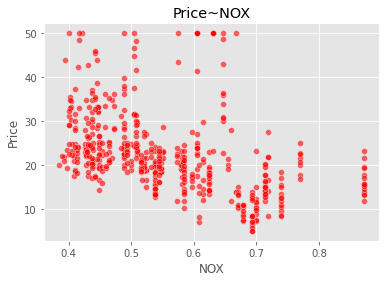

In [3]:
sns.scatterplot(boston_data['NOX'],boston_data['Price'],color="r",alpha=0.6)
plt.title("Price~NOX")
plt.show()

我们可以看到，数据给定任务所需要的因变量，因变量为波士顿房价Price是一个连续型变量，所以这是一个回归的例子。

各个特征的相关解释：
   - CRIM：各城镇的人均犯罪率
   - ZN：规划地段超过25,000平方英尺的住宅用地比例
   - INDUS：城镇非零售商业用地比例
   - CHAS：是否在查尔斯河边(=1是)
   - NOX：一氧化氮浓度(/千万分之一)
   - RM：每个住宅的平均房间数
   - AGE：1940年以前建造的自住房屋的比例
   - DIS：到波士顿五个就业中心的加权距离
   - RAD：放射状公路的可达性指数
   - TAX：全部价值的房产税率(每1万美元)
   - PTRATIO：按城镇分配的学生与教师比例
   - B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
   - LSTAT：较低地位人口
   - Price：房价

# 1.2 分类

我们来看看一个分类的例子，我们来看看大名鼎鼎的iris数据集：

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
iris_data = pd.DataFrame(X,columns=features)
iris_data['target'] = y
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


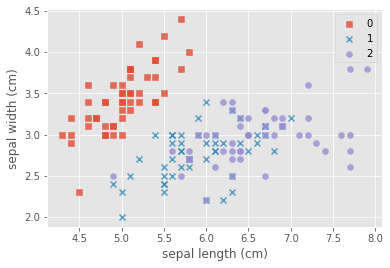

In [5]:
# 可视化特征
marker = ['s','x','o']
for index,c in enumerate(np.unique(y)):
    plt.scatter(x=iris_data.loc[y==c,"sepal length (cm)"],y=iris_data.loc[y==c,"sepal width (cm)"],alpha=0.8,label=c,marker=marker[c])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

我们可以看到：每种不同的颜色和点的样式为一种类型的鸢尾花，数据集有三种不同类型的鸢尾花。因此因变量是一个类别变量，因此通过特征预测鸢尾花类别的问题是一个分类问题。

各个特征的相关解释：
   - sepal length (cm)：花萼长度(厘米)
   - sepal width (cm)：花萼宽度(厘米)
   - petal length (cm)：花瓣长度(厘米)
   - petal width (cm)：花瓣宽度(厘米)

## 1.3 无监督学习

我们可以使用sklearn生成符合自身需求的数据集，下面我们用其中几个函数例子来生成无因变量的数据集：   
https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets    
![jupyter](./1.2.png)

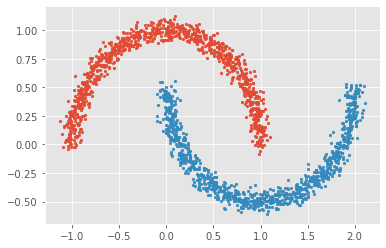

In [6]:
# 生成月牙型非凸集
from sklearn import datasets
x, y = datasets.make_moons(n_samples=2000, shuffle=True,
                  noise=0.05, random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=7)
plt.show()

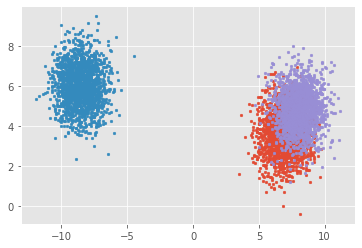

In [7]:
# 生成符合正态分布的聚类数据
from sklearn import datasets
x, y = datasets.make_blobs(n_samples=5000, n_features=2, centers=3)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c, 0], x[y==c, 1],s=7)
plt.show()

**在本开源项目的章节中，我们要重点介绍回归和分类的集成学习的问题，因此我们在接下来的章节中不再介绍关于无监督学习的具体算法，后面的内容仅仅涉及回归和分类问题。**

# 2. 使用sklearn构建完整的机器学习项目流程

一般来说，一个完整的机器学习项目分为以下步骤：
   - 明确项目任务：回归/分类
   - 收集数据集并选择合适的特征。
   - 选择度量模型性能的指标。
   - 选择具体的模型并进行训练以优化模型。
   - 评估模型的性能并调参。

## 2.1 使用sklearn构建完整的回归项目

(1) 收集数据集并选择合适的特征：        
在数据集上我们使用我们比较熟悉的Boston房价数据集，原因是：        
   - 第一个，我们通过这些简单的数据集快速让我们上手sklearn，以及掌握sklearn的相关操作。
   - 第二个，我们用简单的数据集能更加清晰地介绍机器学习的相关模型，避免在处理数据上花费较大的精力。

如果您对具体的项目感兴趣，我们会在第六章给出三个大型的案例让大家体验。

In [8]:
from sklearn import datasets
boston = datasets.load_boston()     # 返回一个类似于字典的类
X = boston.data
y = boston.target
features = boston.feature_names
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


各个特征的相关解释：
   - CRIM：各城镇的人均犯罪率
   - ZN：规划地段超过25,000平方英尺的住宅用地比例
   - INDUS：城镇非零售商业用地比例
   - CHAS：是否在查尔斯河边(=1是)
   - NOX：一氧化氮浓度(/千万分之一)
   - RM：每个住宅的平均房间数
   - AGE：1940年以前建造的自住房屋的比例
   - DIS：到波士顿五个就业中心的加权距离
   - RAD：放射状公路的可达性指数
   - TAX：全部价值的房产税率(每1万美元)
   - PTRATIO：按城镇分配的学生与教师比例
   - B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
   - LSTAT：较低地位人口
   - Price：房价

(2) 选择度量模型性能的指标：                      
   - MSE均方误差：$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$
   - MAE平均绝对误差:$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$
   - $R^2$决定系数：$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
   - 解释方差得分:$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

![jupyter](./1.3.png)              
在这个案例中，我们使用MSE均方误差为模型的性能度量指标。

(3) 选择具体的模型并进行训练
   - **线性回归模型**         
   回归这个概念是19世纪80年代由英国统计学家郎西斯.高尔顿在研究父子身高关系提出来的，他发现：在同一族群中，子代的平均身高介于父代的身高以及族群的平均身高之间。具体而言，高个子父亲的儿子的身高有低于其父亲身高的趋势，而矮个子父亲的儿子身高则有高于父亲的身高的趋势。也就是说，子代的身高有向族群平均身高"平均"的趋势，这就是统计学上"回归"的最初含义。回归分析是一种预测性的建模技术，它研究的是因变量（目标）和自变量（特征）之间的关系。这种技术通常用于预测分析，时间序列模型以及发现变量之间的因果关系。通常使用曲线/线来拟合数据点，目标是使曲线到数据点的距离差异最小。而线性回归就是回归问题中的一种，线性回归假设目标值与特征之间线性相关，即满足一个多元一次方程。通过构建损失函数，来求解损失函数最小时的参数w ：                                                
   假设：数据集$D = \{(x_1,y_1),...,(x_N,y_N) \}$，$x_i \in R^p,y_i \in R,i = 1,2,...,N$，$X = (x_1,x_2,...,x_N)^T,Y=(y_1,y_2,...,y_N)^T$                        
   假设X和Y之间存在线性关系，模型的具体形式为$\hat{y}=f(w) =w^Tx$           
   ![jupyter](./1.4.png)      
   (a) 最小二乘估计：                 
   我们需要衡量真实值$y_i$与线性回归模型的预测值$w^Tx_i$之间的差距，在这里我们和使用二范数的平方和L(w)来描述这种差距，即：                      
   $$
   L(w) = \sum\limits_{i=1}^{N}||w^Tx_i-y_i||_2^2=\sum\limits_{i=1}^{N}(w^Tx_i-y_i)^2 = (w^TX^T-Y^T)(w^TX^T-Y^T)^T = w^TX^TXw - 2w^TX^TY+YY^T\\
   因此，我们需要找到使得L(w)最小时对应的参数w，即：\\
   \hat{w} = argmin\;L(w)\\
   为了达到求解最小化L(w)问题，我们应用高等数学的知识，使用求导来解决这个问题： \\
   \frac{\partial L(w)}{\partial w} = 2X^TXw-2X^TY = 0,因此： \\
   \hat{w} = (X^TX)^{-1}X^TY
   $$                   
   (b) 几何解释：                
   在线性代数中，我们知道两个向量a和b相互垂直可以得出：$<a,b> = a.b = a^Tb = 0$,而平面X的法向量为Y-Xw，与平面X互相垂直，因此：$X^T(Y-Xw) = 0$，即：$w = (X^TX)^{-1}X^TY$                             
   ![jupyter](./1.5.png)               
   (c) 概率视角：       
   假设噪声$\epsilon \backsim N(0,\sigma^2),y=f(w)+\epsilon=w^Tx+\epsilon$，因此：$y|x_i,w ~ N(w^Tx,\sigma^2)$          
   我们使用极大似然估计MLE对参数w进行估计：       
   $$
   L(w) = log\;P(Y|X;w) = log\;\prod_{i=1}^N P(y_i|x_i;w) = \sum\limits_{i=1}^{N} log\; P(y_i|x_i;w)\\
    = \sum\limits_{i=1}^{N}log(\frac{1}{\sqrt{2\pi \sigma}}exp(-\frac{(y_i-w^Tx_i)^2}{2\sigma^2})) = \sum\limits_{i=1}^{N}[log(\frac{1}{\sqrt{2\pi}\sigma})-\frac{1}{2\sigma^2}(y_i-w^Tx_i)^2] \\
    argmax_w L(w) = argmin_w[l(w) = \sum\limits_{i = 1}^{N}(y_i-w^Tx_i)^2]\\
    因此：线性回归的最小二乘估计<==>噪声\epsilon\backsim N(0,\sigma^2)的极大似然估计
   $$
   

下面，我们使用sklearn的线性回归实例来演示：                   
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [9]:
from sklearn import linear_model      # 引入线性回归方法
lin_reg = linear_model.LinearRegression()       # 创建线性回归的类
lin_reg.fit(X,y)        # 输入特征X和因变量y进行训练
print("模型系数：",lin_reg.coef_)             # 输出模型的系数
print("模型得分：",lin_reg.score(X,y))    # 输出模型的决定系数R^2

模型系数： [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
模型得分： 0.7406426641094095


   - **线性回归的推广**                     
   在线性回归中，我们假设因变量与特征之间的关系是线性关系，这样的假设使得模型很简单，但是缺点也是显然的，那就是当数据存在非线性关系时，我们使用线性回归模型进行预测会导致预测性能极其低下，因为模型的形式本身是线性的，无法表达数据中的非线性关系。我们一个很自然的想法就是去推广线性回归模型，使得推广后的模型更能表达非线性的关系。                     
   (a) 多项式回归：        
   为了体现因变量和特征的非线性关系，一个很自然而然的想法就是将标准的线性回归模型：             
   $$
   y_i = w_0 + w_1x_i + \epsilon_i
   $$               
   换成一个多项式函数：          
   $$
   y_i = w_0 + w_1x_i + w_2x_i^2 + ...+w_dx_i^d + \epsilon
   $$                        
   对于多项式的阶数d不能取过大，一般不大于3或者4，因为d越大，多项式曲线就会越光滑，在X的边界处有异常的波动。（图中的边界处的4阶多项式拟合曲线的置信区间(虚线表示置信区间)明显增大，预测效果的稳定性下降。）   

   ![jupyter](./1.6.1.png) ![jupyter](./1.6.2.png)                             
   
   (b) 广义可加模型(GAM)：         
   广义可加模型GAM实际上是线性模型推广至非线性模型的一个框架，在这个框架中，每一个变量都用一个非线性函数来代替，但是模型本身保持整体可加性。GAM模型不仅仅可以用在线性回归的推广，还可以将线性分类模型进行推广。具体的推广形式是：          
   标准的线性回归模型：           
   $$
   y_i = w_0 + w_1x_{i1} +...+w_px_{ip} + \epsilon_i 
   $$                 
   GAM模型框架：                  
   $$
   y_i = w_0 + \sum\limits_{j=1}^{p}f_{j}(x_{ij}) + \epsilon_i
   $$                  
   GAM模型的优点与不足：             
      - 优点：简单容易操作，能够很自然地推广线性回归模型至非线性模型，使得模型的预测精度有所上升；由于模型本身是可加的，因此GAM还是能像线性回归模型一样把其他因素控制不变的情况下单独对某个变量进行推断，极大地保留了线性回归的易于推断的性质。
      - 缺点：GAM模型会经常忽略一些有意义的交互作用，比如某两个特征共同影响因变量，不过GAM还是能像线性回归一样加入交互项$x^{(i)} \times x^{(j)}$的形式进行建模；但是GAM模型本质上还是一个可加模型，如果我们能摆脱可加性模型形式，可能还会提升模型预测精度，详情请看后面的算法。
     
   

(a) 多项式回归实例介绍：                    
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly#sklearn.preprocessing.PolynomialFeatures                              
sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C'):               
   - 参数：         
   degree：特征转换的阶数。                       
   interaction_onlyboolean：是否只包含交互项，默认False 。              
   include_bias：是否包含截距项，默认True。           
   order：str in {‘C’, ‘F’}, default ‘C’，输出数组的顺序。     

In [10]:
from sklearn.preprocessing import PolynomialFeatures
X_arr = np.arange(6).reshape(3, 2)
print("原始X为：\n",X_arr)

poly = PolynomialFeatures(2)
print("2次转化X：\n",poly.fit_transform(X_arr))

poly = PolynomialFeatures(interaction_only=True)
print("2次转化X：\n",poly.fit_transform(X_arr))

原始X为：
 [[0 1]
 [2 3]
 [4 5]]
2次转化X：
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
2次转化X：
 [[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


(b) GAM模型实例介绍：          
安装pygam：pip install pygam               
https://github.com/dswah/pyGAM/blob/master/doc/source/notebooks/quick_start.ipynb                     

In [11]:
from pygam import LinearGAM
gam = LinearGAM().fit(boston_data[boston.feature_names], y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    103.2423
Link Function:                     IdentityLink Log Likelihood:                                 -1589.7653
Number of Samples:                          506 AIC:                                             3388.0152
                                                AICc:                                            3442.7649
                                                GCV:                                               13.7683
                                                Scale:                                              8.8269
                                                Pseudo R-Squared:                                   0.9168
Feature Function                  Lam

<ipython-input-11-bb049c74476f>:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


   - **回归树：**                                   
   基于树的回归方法主要是依据分层和分割的方式将特征空间划分为一系列简单的区域。对某个给定的待预测的自变量，用他所属区域中训练集的平均数或者众数对其进行预测。由于划分特征空间的分裂规则可以用树的形式进行概括，因此这类方法称为决策树方法。决策树由结点(node)和有向边(diredcted edge)组成。结点有两种类型：内部结点(internal node)和叶结点(leaf node)。内部结点表示一个特征或属性，叶结点表示一个类别或者某个值。区域$R_1,R_2$等称为叶节点，将特征空间分开的点为内部节点。                           
   ![jupyter](./1.7.png)                     
   建立回归树的过程大致可以分为以下两步：          
      - 将自变量的特征空间(即$x^{(1)},x^{(2)},x^{(3)},...,x^{(p)}$)的可能取值构成的集合分割成J个互不重叠的区域$R_1,R_2,...,R_j$。        
      - 对落入区域$R_j$的每个观测值作相同的预测，预测值等于$R_j$上训练集的因变量的简单算术平均。              
   具体来说，就是：             
      a.  选择最优切分特征j以及该特征上的最优点s：                
      遍历特征j以及固定j后遍历切分点s，选择使得下式最小的(j,s)  $min_{j,s}[min_{c_1}\sum\limits_{x_i\in R_1(j,s)}(y_i-c_1)^2 + min_{c_2}\sum\limits_{x_i\in R_2(j,s)}(y_i-c_2)^2 ]$                           
       b. 按照(j,s)分裂特征空间：$R_1(j,s) = \{x|x^{j} \le s \}和R_2(j,s) = \{x|x^{j} > s \},\hat{c}_m = \frac{1}{N_m}\sum\limits_{x \in R_m(j,s)}y_i,\;m=1,2$                           
       c. 继续调用步骤1，2直到满足停止条件，就是每个区域的样本数小于等于5。        
       d. 将特征空间划分为J个不同的区域，生成回归树：$f(x) = \sum\limits_{m=1}^{J}\hat{c}_mI(x \in R_m)$                
       如以下生成的关于运动员在棒球大联盟数据的回归树：             
       ![jupyter](./1.8.png)                   
    回归树与线性模型的比较：              
    线性模型的模型形式与树模型的模型形式有着本质的区别，具体而言，线性回归对模型形式做了如下假定：$f(x) = w_0 + \sum\limits_{j=1}^{p}w_jx^{(j)}$，而回归树则是$f(x) = \sum\limits_{m=1}^{J}\hat{c}_mI(x \in R_m)$。那问题来了，哪种模型更优呢？这个要视具体情况而言，如果特征变量与因变量的关系能很好的用线性关系来表达，那么线性回归通常有着不错的预测效果，拟合效果则优于不能揭示线性结构的回归树。反之，如果特征变量与因变量的关系呈现高度复杂的非线性，那么树方法比传统方法更优。                     
    ![jupyter](./1.9.1.png)                        
    树模型的优缺点：                 
    - 树模型的解释性强，在解释性方面可能比线性回归还要方便。
    - 树模型更接近人的决策方式。
    - 树模型可以用图来表示，非专业人士也可以轻松解读。
    - 树模型可以直接做定性的特征而不需要像线性回归一样哑元化。
    - 树模型能很好处理缺失值和异常值，对异常值不敏感，但是这个对线性模型来说却是致命的。
    - 树模型的预测准确性一般无法达到其他回归模型的水平，但是改进的方法很多。

sklearn使用回归树的实例：                
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=tree#sklearn.tree.DecisionTreeRegressor                         
sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0）                                                 
   - 参数：(列举几个重要的，常用的，详情请看上面的官网)                 
   criterion：{“ mse”，“ friedman_mse”，“ mae”}，默认=“ mse”。衡量分割标准的函数 。                      
   splitter：{“best”, “random”}, default=”best”。分割方式。                    
   max_depth：树的最大深度。               
   min_samples_split：拆分内部节点所需的最少样本数，默认是2。                      
   min_samples_leaf：在叶节点处需要的最小样本数。默认是1。                    
   min_weight_fraction_leaf：在所有叶节点处（所有输入样本）的权重总和中的最小加权分数。如果未提供sample_weight，则样本的权重相等。默认是0。                      

In [12]:
from sklearn.tree import DecisionTreeRegressor    
reg_tree = DecisionTreeRegressor(criterion = "mse",min_samples_leaf = 5)
reg_tree.fit(X,y)
reg_tree.score(X,y)

0.9376307599929274

   - 支持向量机回归(SVR)                                        
   在介绍支持向量回归SVR之前，我们先来了解下约束优化的相关知识：          
      - 约束优化问题(P)：                   
      $$
      min f(x)  \\
      s.t.\;\;\;g_i(x) \le 0,\; i=1,2,...,m\\
      \;\;\;\;\; h_j(x) = 0,\; j=1,2,...,l
      $$                         
   我们假设$x^*$为满足以上条件的局部最优解，$p^* = f(x^*)$，我们的目的就是要找到$x^*$与$p^*$，满足不等式和等式约束的x集合成为可行域，记作S。
   
    - KKT条件(最优解的一阶必要条件)          
    因为KKT条件是最优化的相关内容，在本次开源学习中并不是重点，因此在这里我用一个更加简单的例子说明KKT条件，严格的证明请参见凸优化相关书籍。                       
    在这个例子中，我们考虑：($x^*$为我们的最优解)               
    $$
    minf(x)\\
    s.t.\;g_1(x) \le 0,\;x \in R^n\\
    \;\;\;g_2(x) \le 0\\
    \;\;\;g_3(x) \le 0
    $$
    ![jupyter](./1.11.png)
      
      我们可以看到：$-\nabla f(x^*)$可以由$\nabla g_1(x^*)$与$\nabla g_2(x^*)$线性表出，因此有：$-\nabla f(x^*) = \lambda_1 \nabla g_1(x^*) + \lambda_2 \nabla g_2(x^*)$，其中$\lambda_1,\lambda_2 \ge 0$，即：                          
      $$
      \nabla f(x^*) + \lambda_1 \nabla g_1(x^*) + \lambda_2 \nabla g_2(x^*) = 0,\;\;\;其中\lambda_1,\lambda_2 \ge 0
      $$                       
      我们把没有起作用的约束$g_3(x)$也放到式子里面去，目的也就是为了书写方便，即要求：                  
      $$
      \nabla f(x^*) + \lambda_1 \nabla g_1(x^*) + \lambda_2 \nabla g_2(x^*) + \lambda_3 \nabla g_3(x^*)= 0,\;\;\;其中\lambda_1,\lambda_2 \ge 0,\lambda_3 = 0
      $$                      
      由于点$x^*$位于方程$g_1(x)=0$与$g_2(x)=0$上，因此：$\lambda_1 g_1(x^*)  = 0,\lambda_2  g_2(x^*) = 0 , \lambda_3  g_3(x^*)= 0$                        
      
      因此，KKT条件就是：假设$x^*$为最优化问题(P)的局部最优解，且$x^*$ 在某个适当的条件下 ,有：                             
      $$
     \nabla f(x^*) + \sum\limits_{i=1}^{m}\lambda_i \nabla g(x^*) + \sum\limits_{j=1}^{l}\mu_j \nabla h_j(x^*) = 0(对偶条件)\\     
      \lambda_i \ge 0,\;i = 1,2,...,m(对偶条件)\\
      g_i(x^*) \le 0(原问题条件)\\
      h_j(x^*) = 0(原问题条件)\\
      \lambda_i g(x^*) = 0(互补松弛定理)
      $$                              
 - 对偶理论：               
   为什么要引入对偶问题呢？是因为原问题与对偶问题就像是一个问题两个角度去看，如利润最大与成本最低等。有时侯原问题上难以解决，但是在对偶问题上就会变得很简单。再者，任何一个原问题在变成对偶问题后都会变成一个凸优化的问题，这点我们后面会有介绍。下面我们来引入对偶问题：                           
   首先，我们的原问题(P)是：
      $$
      min f(x)  \\
      s.t.\;\;\;g_i(x) \le 0,\; i=1,2,...,m\\
      \;\;\;\;\; h_j(x) = 0,\; j=1,2,...,l
      $$                             
      引入拉格朗日函数：$L(x,\lambda,\mu) = f(x) + \sum\limits_{i=1}^{m}\lambda_i g_i(x) + \sum\limits_{j=1}^{l}\mu_j h_j(x)$                        
      拉格朗日对偶函数：                                  
      $$
      d(\lambda,\mu)  =  min_{x\in X}\{ f(x) + \sum\limits_{i=1}^{m}\lambda_i g_i(x) + \sum\limits_{j=1}^{l}\mu_j h_j(x)\} ,其中X为满足条件的x变量\\
      \le min_{x\in S}\{ f(x) + \sum\limits_{i=1}^{m}\lambda_i g_i(x) + \sum\limits_{j=1}^{l}\mu_j h_j(x) \},由于g_i(x) \le 0,h_j(x) = 0,\lambda_i \ge 0 ,其中S为可行域\\
      \le min_{x\in S}\{f(x) \}
      $$                                   
      因此：拉格朗日对偶函数$d(\lambda,\mu)$是原问题最优解的函数值$p^*$的下界，即每个不同的$\lambda$与$\mu$确定的$d(\lambda,\mu)$都是$p^*$的下界，但是我们希望下界越大越好，因为越大就更能接近真实的$p^*$。因此：                               
      拉格朗日对偶问题(D)转化为：                 
      $$
      max_{\lambda,\mu}d(\lambda,\mu)\\
      s.t. \lambda_i \ge 0,i = 1,2,...,m\\
      也就是：\\
      max_{\lambda \ge 0,\mu}\;min_{x \in S} L(x,\lambda,\mu)
      $$                   
      我们可以观察到，对偶问题是关于$\lambda$和$\mu$的线性函数，因此对偶问题是一个凸优化问题，凸优化问题在最优化理论较为简单。
      弱对偶定理：对偶问题(D)的最优解$D^*$一定小于原问题最优解$P^*$，这点在刚刚的讨论得到了充分的证明，一定成立。                   
      强对偶定理：对偶问题(D)的最优解$D^*$在一定的条件下等于原问题最优解$P^*$，条件非常多样化且不是唯一的，也就是说这是个开放性的问题，在这里我给出一个最简单的条件，即：$f(x)$与$g_i(x)$为凸函数，$h_j(x)$为线性函数，X是凸集，$x^*$满足KKT条件，那么$D^* = P^*$。 
      
   
      

   - 支持向量回归SVR                    
   在介绍完了相关的优化知识以后，我们开始正式学习支持向量回归SVR。                    
   ![jupyter](./1.10.png)                         
   在线性回归的理论中，每个样本点都要计算平方损失，但是SVR却是不一样的。SVR认为：落在$f(x)$的$\epsilon$邻域空间中的样本点不需要计算损失，这些都是预测正确的，其余的落在$\epsilon$邻域空间以外的样本才需要计算损失，因此：              
   ![jupyter](./1.12.png)                                      
   $$
   min_{w,b,\xi_i,\hat{\xi}_i} \frac{1}{2}||w||^2 +C \sum\limits_{i=1}^{N}(\xi_i,\hat{\xi}_i)\\
   s.t.\;\;\; f(x_i) - y_i \le \epsilon + \xi_i\\
   \;\;\;\;\;y_i - f(x_i) \le  \epsilon +\hat{\xi}_i\\
   \;\;\;\;\; \xi_i,\hat{\xi}_i \le 0,i = 1,2,...,N
   $$                                 
   引入拉格朗日函数：                  
   $$
   \begin{array}{l}
L(w, b, \alpha, \hat{\alpha}, \xi, \xi, \mu, \hat{\mu}) \\
\quad=\frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{N}\left(\xi_{i}+\widehat{\xi}_{i}\right)-\sum_{i=1}^{N} \xi_{i} \mu_{i}-\sum_{i=1}^{N} \widehat{\xi}_{i} \widehat{\mu}_{i} \\
\quad+\sum_{i=1}^{N} \alpha_{i}\left(f\left(x_{i}\right)-y_{i}-\epsilon-\xi_{i}\right)+\sum_{i=1}^{N} \widehat{\alpha}_{i}\left(y_{i}-f\left(x_{i}\right)-\epsilon-\widehat{\xi}_{i}\right)
\end{array}
   $$                       
   再令$L(w, b, \alpha, \hat{\alpha}, \xi, \xi, \mu, \hat{\mu})$对$w,b,\xi,\hat{\xi}$求偏导等于0，得： $w=\sum_{i=1}^{N}\left(\widehat{\alpha}_{i}-\alpha_{i}\right) x_{i}$。                             
   上述过程中需满足KKT条件，即要求：                 
   $$
   \left\{\begin{array}{c}
\alpha_{i}\left(f\left(x_{i}\right)-y_{i}-\epsilon-\xi_{i}\right)=0 \\
\hat{\alpha_{i}}\left(y_{i}-f\left(x_{i}\right)-\epsilon-\hat{\xi}_{i}\right)=0 \\
\alpha_{i} \widehat{\alpha}_{i}=0, \xi_{i} \hat{\xi}_{i}=0 \\
\left(C-\alpha_{i}\right) \xi_{i}=0,\left(C-\widehat{\alpha}_{i}\right) \hat{\xi}_{i}=0
\end{array}\right.
   $$                         
   SVR的解形如:$f(x)=\sum_{i=1}^{N}\left(\widehat{\alpha}_{i}-\alpha_{i}\right) x_{i}^{T} x+b$                                                  
   
  

sklearn中使用SVR实例：                        
sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)            
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR                        
   - 参数：                   
   kernel：核函数，{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, 默认=’rbf’。(后面会详细介绍)              
   degree：多项式核函数的阶数。默认 = 3。                          
   C：正则化参数，默认=1.0。(后面会详细介绍)                            
   epsilon：SVR模型允许的不计算误差的邻域大小。默认0.1。              
   

In [13]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler     # 标准化数据
from sklearn.pipeline import make_pipeline   # 使用管道，把预处理和模型形成一个流程

reg_svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
reg_svr.fit(X, y)
reg_svr.score(X,y)

0.7024525421955277

(4) 优化基础模型                   
在刚刚的回归问题的基本算法中，我们使用数据集去估计模型的参数，如线性回归模型中的参数w，那么这个数据集我们称为训练数据集，简称训练集。我们在回归问题中使用训练集估计模型的参数的原则一般都是使得我们的损失函数在训练集达到最小值，其实在实际问题中我们是可以让损失函数在训练集最小化为0，如：在线性回归中，我加入非常多的高次项，使得我们模型在训练集的每一个数据点都恰好位于曲线上，那这时候模型在训练集的损失值也就是误差为0。                
![jupyter](./1.13.png)                            
既然能做到这件事，是不是代表我们的建模完事大吉呢？换句话说我们的模型可以预测任意情况呢？答案是显然否定的。我们建立机器学习的目的并不是为了在已有的数据集，也就是训练集上效果表现非常优异，我们希望建立的机器学习模型在未知且情况复杂的测试数据上表现优异，我们称这样的未出现在训练集的未知数据集成为测试数据集，简称测试集。我们希望模型在测试集上表现优异！因为假如我们根据股票市场前六个月的数据拟合一个预测模型，我们的目的不是为了预测以前这六个月越准越好，而是预测明天乃至未来的股价变化。                                  
   - (a) 训练均方误差与测试均方误差：                   
   在回归中，我们最常用的评价指标为均方误差，即：$MSE = \frac{1}{N}\sum\limits_{i=1}^{N}(y_i -\hat{ f}(x_i))^2$，其中$\hat{ f}(x_i)$是样本$x_i$应用建立的模型$\hat{f}$预测的结果。如果我们所用的数据是训练集上的数据，那么这个误差为训练均方误差，如果我们使用测试集的数据计算的均方误差，我们称为测试均方误差。一般而言，我们并不关心模型在训练集上的训练均方误差，我们关心的是模型面对未知的样本集，即测试集上的测试误差，我们的目标是使得我们建立的模型在测试集上的测试误差最小。那我们如何选择一个测试误差最小的模型呢？这是个棘手的问题，因为在模型建立阶段，我们是不能得到测试数据的，比如：我们在模型未上线之前是不能拿到未知且真实的测试数据来验证我们的模型的。在这种情况下，为了简便起见，一些观点认为通过训练误差最小化来选择模型也是可行的。这种观点表面看上去是可行的，但是存在一个致命的缺点，那就是：一个模型的训练均方误差最小时，不能保证测试均方误差同时也很小。对于这种想法构造的模型，一般在训练误差达到最小时，测试均方误差一般很大！如图：                       
   ![jupyter](./1.14.png)                       
   ![jupyter](./1.15.png)                    
   可以看到：当我们的模型的训练均方误差达到很小时，测试均方误差反而很大，但是我们寻找的最优的模型是测试均方误差达到最小时对应的模型，因此基于训练均方误差达到最小选择模型本质上是行不同的。正如上右图所示：模型在训练误差很小，但是测试均方误差很大时，我们称这种情况叫模型的**过拟合**。                            
   - (b) 偏差-方差的权衡：                         
   从上图的测试均方误差曲线可以看到：测试均方误差曲线呈现U型曲线，这表明了在测试误差曲线中有两种力量在互相博弈。可以证明：           
   $$
   E\left(y_{0}-\hat{f}\left(x_{0}\right)\right)^{2}=\operatorname{Var}\left(\hat{f}\left(x_{0}\right)\right)+\left[\operatorname{Bias}\left(\hat{f}\left(x_{0}\right)\right)\right]^{2}+\operatorname{Var}(\varepsilon)
   $$                  
   也就是说，我们的测试均方误差的期望值可以分解为$\hat{f}(x_0)$的方差、$\hat{f}(x_0)$的偏差平方和误差项$\epsilon$的方差。为了使得模型的测试均方误差达到最小值，也就是同时最小化偏差的平方和方差。由于我们知道偏差平方和方差本身是非负的，因此测试均方误差的期望不可能会低于误差的方差，因此我们称$\operatorname{Var}(\varepsilon)$为建模任务的难度，这个量在我们的任务确定后是无法改变的，也叫做不可约误差。那么模型的方差和偏差的平方和究竟是什么呢？所谓模型的方差就是：用不同的数据集去估计$f$时，估计函数的改变量。举个例子：我们想要建立一个线性回归模型，可以通过输入中国人身高去预测我们的体重。但是显然我们没有办法把全中国13亿人做一次人口普查，拿到13亿人的身高体重去建立模型。我们能做的就是从13亿中抽1000个样本进行建模，我们对这个抽样的过程重复100遍，就会得到100个1000人的样本集。我们使用线性回归模型估计参数就能得到100个线性回归模型。由于样本抽取具有随机性，我们得到的100个模型不可能参数完全一样，那么这100个模型之间的差异就叫做方差。显然，我们希望得到一个稳定的模型，也就是在不同的样本集估计的模型都不会相差太大，即要求f的方差越小越好。**一般来说，模型的复杂度越高，f的方差就会越大。** 如加入二次项的模型的方差比线性回归模型的方差要大。                              
   ![jupyter](./1.16.png)                                
   另一方面，模型的偏差是指：为了选择一个简单的模型去估计真实函数所带入的误差。假如真实的数据X与Y的关系是二次关系，但是我们选择了线性模型进行建模，那由于模型的复杂度引起的这种误差我们称为偏差，它的构成时复杂的。偏差度量了学习算法的期望预测与真实结果的偏离程度，即刻画了学习算法本身的拟合能力。偏差度量的是单个模型的学习能力，而方差度量的是同一个模型在不同数据集上的稳定性。“偏差-方差分解”说明：泛化性能是由学习算法的能力、数据的充分性以及学习任务本身的难度所共同决定的。给定学习任务，为了取得好的泛化性能，则需使偏差较小，即能够充分拟合数据，并且使方差较小，即使得数据扰动产生的影响小。                          
   ![jupyter](./1.17.png)                    
   一般而言，增加模型的复杂度，会增加模型的方差，但是会减少模型的偏差，我们要找到一个方差--偏差的权衡，使得测试均方误差最。                        
   ![jupyter](./1.18.png)                              
   (c) 特征提取：              
   在前面的讨论中，我们已经明确一个目标，就是：我们要选择一个测试误差达到最小的模型。但是实际上我们很难对实际的测试误差做精确的计算，因此我们要对测试误差进行估计，估计的方式有两种：训练误差修正与交叉验证。                         
      - 训练误差修正：      
      前面的讨论我们已经知道，模型越复杂，训练误差越小，测试误差先减后增。因此，我们先构造一个特征较多的模型使其过拟合，此时训练误差很小而测试误差很大，那这时我们加入关于特征个数的惩罚。因此，当我们的训练误差随着特征个数的增加而减少时，惩罚项因为特征数量的增加而增大，抑制了训练误差随着特征个数的增加而无休止地减小。具体的数学量如下：             
      $C_p = \frac{1}{N}(RSS  +  2d\hat{\sigma}^2)$，其中d为模型特征个数，$RSS = \sum\limits_{i=1}^{N}(y_i-\hat{f}(x_i))^2$，$\hat{\sigma}^2$为模型预测误差的方差的估计值，即残差的方差。                       
      AIC赤池信息量准则：$AIC = \frac{1}{d\hat{\sigma}^2}(RSS  +  2d\hat{\sigma}^2)$                              
      BIC贝叶斯信息量准则：$BIC = \frac{1}{n}(RSS + log(n)d\hat{\sigma}^2)$                     
      - 交叉验证：                   
      前面讨论的对训练误差修正得到测试误差的估计是间接方法，这种方法的桥梁是训练误差，而交叉验证则是对测试误差的直接估计。交叉验证比训练误差修正的优势在于：能够给出测试误差的一个直接估计。在这里只介绍K折交叉验证：我们把训练样本分成K等分，然后用K-1个样本集当做训练集，剩下的一份样本集为验证集去估计由K-1个样本集得到的模型的精度，这个过程重复K次取平均值得到测试误差的一个估计$CV_{(K)} = \frac{1}{K}\sum\limits_{i=1}^{K}MSE_i$。5折交叉验证如下图：（蓝色的是训练集，黄色的是验证集）                     
      ![jupyter](./1.19.png)                   
   
   在测试误差能够被合理的估计出来以后，我们做特征选择的目标就是：从p个特征中选择m个特征，使得对应的模型的测试误差的估计最小。对应的方法有：
      - 最优子集选择：                  
      (i) 记不含任何特征的模型为$M_0$，计算这个$M_0$的测试误差。                                              
      (ii) 在$M_0$基础上增加一个变量，计算p个模型的RSS，选择RSS最小的模型记作$M_1$，并计算该模型$M_1$的测试误差。                                          
      (iii) 再增加变量，计算p-1个模型的RSS，并选择RSS最小的模型记作$M_2$，并计算该模型$M_2$的测试误差。                                                
      (iv) 重复以上过程知道拟合的模型有p个特征为止，并选择p+1个模型$\{M_0,M_1,...,M_p \}$中测试误差最小的模型作为最优模型。                           
      - 向前逐步选择：               
      最优子集选择虽然在原理上很直观，但是随着数据特征维度p的增加，子集的数量为$2^p$，计算效率非常低下且需要的计算内存也很高，在大数据的背景下显然不适用。因此，我们需要把最优子集选择的运算效率提高，因此向前逐步选择算法的过程如下：                            
      (i) 记不含任何特征的模型为$M_0$，计算这个$M_0$的测试误差。                    
      (ii) 在$M_0$基础上增加一个变量，计算p个模型的RSS，选择RSS最小的模型记作$M_1$，并计算该模型$M_1$的测试误差。                  
      (iii) 在最小的RSS模型下继续增加一个变量，选择RSS最小的模型记作$M_2$，并计算该模型$M_2$的测试误差。                  
      (iv) 以此类推，重复以上过程知道拟合的模型有p个特征为止，并选择p+1个模型$\{M_0,M_1,...,M_p \}$中测试误差最小的模型作为最优模型。                      
  
  (d) 压缩估计(正则化)：                         
  除了刚刚讨论的直接对特征自身进行选择以外，我们还可以对回归的系数进行约束或者加罚的技巧对p个特征的模型进行拟合，显著降低模型方差，这样也会提高模型的拟合效果。具体来说，就是将回归系数往零的方向压缩，这也就是为什么叫压缩估计的原因了。                          
     - 岭回归(L2正则化的例子)：                 
     在线性回归中，我们的损失函数为$J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2$，我们在线性回归的损失函数的基础上添加对系数的约束或者惩罚，即：                           
     $$
     J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2 + \lambda\sum\limits_{j=1}^{p}w_j^2,\;\;其中，\lambda \ge 0\\
     \hat{w} = (X^TX + \lambda I)^{-1}X^TY
     $$                        
   调节参数$\lambda$的大小是影响压缩估计的关键，$\lambda$越大，惩罚的力度越大，系数则越趋近于0，反之，选择合适的$\lambda$对模型精度来说十分重要。岭回归通过牺牲线性回归的无偏性降低方差，有可能使得模型整体的测试误差较小，提高模型的泛化能力。                                 
     - Lasso回归(L1正则化的例子)：             
     岭回归的一个很显著的特点是：将模型的系数往零的方向压缩，但是岭回归的系数只能呢个趋于0但无法等于0，换句话说，就是无法做特征选择。能否使用压缩估计的思想做到像特征最优子集选择那样提取出重要的特征呢？答案是肯定的！我们只需要对岭回归的优化函数做小小的调整就行了，我们使用系数向量的L1范数替换岭回归中的L2范数：                     
     $$
     J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2 + \lambda\sum\limits_{j=1}^{p}|w_j|,\;\;其中，\lambda \ge 0
     $$                  
   为什么Losso能做到特征选择而岭回归却不能呢个做到呢？(如图：左边为lasso，右边为岭回归)                
   ![jupyter](./1.20.png)                       
   椭圆形曲线为RSS等高线，菱形和圆形区域分别代表了L1和L2约束，Lsaao回归和岭回归都是在约束下的回归，因此最优的参数为椭圆形曲线与菱形和圆形区域相切的点。但是Lasso回归的约束在每个坐标轴上都有拐角，因此当RSS曲线与坐标轴相交时恰好回归系数中的某一个为0，这样就实现了特征提取。反观岭回归的约束是一个圆域，没有尖点，因此与RSS曲线相交的地方一般不会出现在坐标轴上，因此无法让某个特征的系数为0，因此无法做到特征提取。                                
   
   (e) 降维：                
   到目前为止，我们所讨论的方法对方差的控制有两种方式：一种是使用原始变量的子集，另一种是将变量系数压缩至零。但是这些方法都是基于原始特征$x_1,...,x_p$得到的，现在我们探讨一类新的方法：将原始的特征空间投影到一个低维的空间实现变量的数量变少，如：将二维的平面投影至一维空间。机器学习领域中所谓的降维就是指采用某种映射方法，将原高维空间中的数据点映射到低维度的空间中。降维的本质是学习一个映射函数 f : x->y，其中x是原始数据点的表达，目前最多使用向量表达形式。 y是数据点映射后的低维向量表达，通常y的维度小于x的维度（当然提高维度也是可以的）。f可能是显式的或隐式的、线性的或非线性的。目前大部分降维算法处理向量表达的数据，也有一些降维算法处理高阶张量表达的数据。之所以使用降维后的数据表示是因为在原始的高维空间中，包含有冗余信息以及噪音信息，在实际应用例如图像识别中造成了误差，降低了准确率；而通过降维,我们希望减少 冗余信息 所造成的误差,提高识别（或其他应用）的精度。又或者希望通过降维算法来寻找数据内部的本质结构特征。在很多算法中，降维算法成为了数据预处理的一部分，如PCA。事实上，有一些算法如果没有降维预处理，其实是很难得到很好的效果的。 (摘自：rosenor1博客)                                
   主成分分析(PCA)：                     
   主成分分析的思想：通过**最大投影方差** 将原始空间进行重构，即由特征相关重构为无关，即落在某个方向上的点(投影)的方差最大。在进行下一步推导之前，我们先把样本均值和样本协方差矩阵推广至矩阵形式：                     
   样本均值Mean:$\bar{x} = \frac{1}{N}\sum\limits_{i=1}^{N}x_i =  \frac{1}{N}X^T1_N,\;\;\;其中1_N = (1,1,...,1)_{N}^T$                         
   样本协方差矩阵$S^2 = \frac{1}{N}\sum\limits_{i=1}^{N}(x_i-\bar{x})(x_i-\bar{x})^T = \frac{1}{N}X^THX,\;\;\;其中，H = I_N - \frac{1}{N}1_N1_N^T$                             
   最大投影方差的步骤：                
   (i) 中心化：$x_i - \bar{x}$                       
   (ii) 计算每个点$x_1,...,x_N$至$\vec{u}_1$方向上的投影：$(x_i-\bar{x})\vec{u}_1,\;\;\;||\vec{u}_1|| = 1$                             
   (iii) 计算投影方差：$J = \frac{1}{N}\sum\limits_{i=1}^{N}[(x_i-\bar{x})^T\vec{u}_1]^2,\;\;\;||\vec{u}_1|| = 1$                           
   (iv) 最大化投影方差求$\vec{u}_1$：                       
   $$
   \bar{u}_1 = argmax_{u_1}\;\;\frac{1}{N}\sum\limits_{i=1}^{N}[(x_i-\bar{x})^T\vec{u}_1]^2 \\
   \;\;\;s.t. \vec{u}_1^T\vec{u}_1 = 1 (\vec{u}_1往后不带向量符号)
   $$                         
   得到：               
   $$
   J = \frac{1}{N}\sum\limits_{i=1}^{N}[(x_i-\bar{x})^T\vec{u}_1]^2  = \frac{1}{N}\sum\limits_{i=1}^{N}[u_1^T(x_i-\bar{x})(x_i-\bar{x})^Tu_1]\\
   \; = u_1^T[\frac{1}{N}\sum\limits_{i=1}^{N}(x_i-\bar{x})(x_i - \bar{x})^T]u_1 = u_1^TS^2u_1
   $$                    
   即：           
   $$
   \hat{u}_1 = argmax_{u_1}u_1^TS^2u_1,\;\;\;s.t.u_1^Tu_1 = 1\\
   L(u_1,\lambda) = u_1^TS^2u_1 + \lambda (1-u_1^Tu_1)\\
   \frac{\partial L}{\partial u_1} = 2S^2u_1-2\lambda u_1 = 0\\
   即：S^2u_1 = \lambda u_1
   $$                        
   可以看到：$\lambda$为$S^2$的特征值，$u_1$为$S^2$的特征向量。因此我们只需要对中心化后的协方差矩阵进行特征值分解，得到的特征向量即为投影方向。如果需要进行降维，那么只需要取p的前M个特征向量即可。
   
    
   
      
      
   


     
   


特征提取的实例：向前逐步回归                      
案例来源：https://blog.csdn.net/weixin_44835596/article/details/89763300                            
根据AIC准则定义向前逐步回归进行变量筛选

In [14]:
#定义向前逐步回归函数
def forward_select(data,target):
    variate=set(data.columns)  #将字段名转换成字典类型
    variate.remove(target)  #去掉因变量的字段名
    selected=[]
    current_score,best_new_score=float('inf'),float('inf')  #目前的分数和最好分数初始值都为无穷大（因为AIC越小越好）
    #循环筛选变量
    while variate:
        aic_with_variate=[]
        for candidate in variate:  #逐个遍历自变量
            formula="{}~{}".format(target,"+".join(selected+[candidate]))  #将自变量名连接起来
            aic=ols(formula=formula,data=data).fit().aic  #利用ols训练模型得出aic值
            aic_with_variate.append((aic,candidate))  #将第每一次的aic值放进空列表
        aic_with_variate.sort(reverse=True)  #降序排序aic值
        best_new_score,best_candidate=aic_with_variate.pop()  #最好的aic值等于删除列表的最后一个值，以及最好的自变量等于列表最后一个自变量
        if current_score>best_new_score:  #如果目前的aic值大于最好的aic值
            variate.remove(best_candidate)  #移除加进来的变量名，即第二次循环时，不考虑此自变量了
            selected.append(best_candidate)  #将此自变量作为加进模型中的自变量
            current_score=best_new_score  #最新的分数等于最好的分数
            print("aic is {},continuing!".format(current_score))  #输出最小的aic值
        else:
            print("for selection over!")
            break
    formula="{}~{}".format(target,"+".join(selected))  #最终的模型式子
    print("final formula is {}".format(formula))
    model=ols(formula=formula,data=data).fit()
    return(model)

In [15]:
import statsmodels.api as sm #最小二乘
from statsmodels.formula.api import ols #加载ols模型
forward_select(data=boston_data,target="Price")

aic is 3286.974956900157,continuing!
aic is 3171.5423142992013,continuing!
aic is 3114.0972674193326,continuing!
aic is 3097.359044862759,continuing!
aic is 3069.438633167217,continuing!
aic is 3057.9390497191152,continuing!
aic is 3048.438382711162,continuing!
aic is 3042.274993098419,continuing!
aic is 3040.154562175143,continuing!
aic is 3032.0687017003256,continuing!
aic is 3021.726387825062,continuing!
for selection over!
final formula is Price~LSTAT+RM+PTRATIO+DIS+NOX+CHAS+B+ZN+CRIM+RAD+TAX


In [16]:
lm=ols("Price~LSTAT+RM+PTRATIO+DIS+NOX+CHAS+B+ZN+CRIM+RAD+TAX",data=boston_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          5.54e-137
Time:                        20:49:31   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
RM             3.8016      0.406      9.356      0.000       3.003       4.600
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
B              0.0093      0.003      3.475      0.001       0.004       0.015
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

岭回归实例分享：                   
sklearn.linear_model.ridge_regression(X, y, alpha, *, sample_weight=None, solver='auto', max_iter=None, tol=0.001, verbose=0, random_state=None, return_n_iter=False, return_intercept=False, check_input=True)                          
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html?highlight=rid#sklearn.linear_model.ridge_regression                      
   - 参数：                     
   alpha：较大的值表示更强的正则化。浮点数                   
   sample_weight：样本权重，默认无。                      
   solver：求解方法，{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}, 默认=’auto’。“ svd”使用X的奇异值分解来计算Ridge系数。'cholesky'使用标准的scipy.linalg.solve函数通过dot（XT，X）的Cholesky分解获得封闭形式的解。'sparse_cg'使用scipy.sparse.linalg.cg中的共轭梯度求解器。作为一种迭代算法，对于大规模数据（可能设置tol和max_iter），此求解器比“ Cholesky”更合适。 lsqr”使用专用的正则化最小二乘例程scipy.sparse.linalg.lsqr。它是最快的，并且使用迭代过程。“ sag”使用随机平均梯度下降，“ saga”使用其改进的无偏版本SAGA。两种方法都使用迭代过程，并且当n_samples和n_features都很大时，通常比其他求解器更快。请注意，只有在比例大致相同的要素上才能确保“ sag”和“ saga”快速收敛。您可以使用sklearn.preprocessing中的缩放器对数据进行预处理。最后五个求解器均支持密集和稀疏数据。但是，当fit_intercept为True时，仅'sag'和'sparse_cg'支持稀疏输入。                             
   
   


In [17]:
from sklearn import linear_model
reg_rid = linear_model.Ridge(alpha=.5)
reg_rid.fit(X,y)
reg_rid.score(X,y)

0.739957023371629

Lasso实例分享：                  
class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')                           
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso                                
   - 参数：                
   alpha：正则化强度，1.0代表标准最小二乘。                
   fit_intercept：是否计算模型截距。默认true。                         
   normalize：是否标准化，默认false。                   
   positive：是否强制系数为正，默认false。


In [18]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha = 0.5)
reg_lasso.fit(X,y)
reg_lasso.score(X,y)

0.7140164719858566

(5) 对模型超参数进行调优(调参)：                             
在刚刚的讨论中，我们似乎对模型的优化都是对模型算法本身的改进，比如：岭回归对线性回归的优化在于在线性回归的损失函数中加入L2正则化项从而牺牲无偏性降低方差。但是，大家是否想过这样的问题：在L2正则化中参数$\lambda$应该选择多少？是0.01、0.1、还是1？到目前为止，我们只能凭经验或者瞎猜，能不能找到一种方法找到最优的参数$\lambda$？事实上，找到最佳参数的问题本质上属于最优化的内容，因为从一个参数集合中找到最佳的值本身就是最优化的任务之一，我们脑海中浮现出来的算法无非就是：梯度下降法、牛顿法等无约束优化算法或者约束优化算法，但是在具体验证这个想法是否可行之前，我们必须先认识两个最本质概念的区别。                                     
   - 参数与超参数：                            
   我们很自然的问题就是岭回归中的参数$\lambda$和参数w之间有什么不一样？事实上，参数w是我们通过设定某一个具体的$\lambda$后使用类似于最小二乘法、梯度下降法等方式优化出来的，我们总是设定了$\lambda$是多少后才优化出来的参数w。因此，类似于参数w一样，使用最小二乘法或者梯度下降法等最优化算法优化出来的数我们称为参数，类似于$\lambda$一样，我们无法使用最小二乘法或者梯度下降法等最优化算法优化出来的数我们称为超参数。                                       
   模型参数是模型内部的配置变量，其值可以根据数据进行估计。                       
      - 进行预测时需要参数。                     
      - 它参数定义了可使用的模型。                        
      - 参数是从数据估计或获悉的。                       
      - 参数通常不由编程者手动设置。                     
      - 参数通常被保存为学习模型的一部分。                      
      - 参数是机器学习算法的关键，它们通常由过去的训练数据中总结得出 。                          
   模型超参数是模型外部的配置，其值无法从数据中估计。
      - 超参数通常用于帮助估计模型参数。
      - 超参数通常由人工指定。
      - 超参数通常可以使用启发式设置。
      - 超参数经常被调整为给定的预测建模问题。                            
   我们前面(4)部分的优化都是基于模型本身的具体形式的优化，那本次(5)调整的内容是超参数，也就是取不同的超参数的值对于模型的性能有不同的影响。                             
   - 网格搜索GridSearchCV()：                
   网格搜索：https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV                         
   网格搜索结合管道：https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html?highlight=gridsearchcv                              
   网格搜索的思想非常简单，比如你有2个超参数需要去选择，那你就把所有的超参数选择列出来分别做排列组合。举个例子：$\lambda = 0.01,0.1,1.0$和$\alpha = 0.01,0.1,1.0$,你可以做一个排列组合，即：{[0.01,0.01],[0.01,0.1],[0.01,1],[0.1,0.01],[0.1,0.1],[0.1,1.0],[1,0.01],[1,0.1],[1,1]}  ，然后针对每组超参数分别建立一个模型，然后选择测试误差最小的那组超参数。换句话说，我们需要从超参数空间中寻找最优的超参数，很像一个网格中找到一个最优的节点，因此叫网格搜索。                         
   - 随机搜索 RandomizedSearchCV() ：               
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV                           
   网格搜索相当于暴力地从参数空间中每个都尝试一遍，然后选择最优的那组参数，这样的方法显然是不够高效的，因为随着参数类别个数的增加，需要尝试的次数呈指数级增长。有没有一种更加高效的调优方式呢？那就是使用随机搜索的方式，这种方式不仅仅高校，而且实验证明，随机搜索法结果比稀疏化网格法稍好(有时候也会极差，需要权衡)。参数的随机搜索中的每个参数都是从可能的参数值的分布中采样的。与网格搜索相比，这有两个主要优点：        
      - 可以独立于参数数量和可能的值来选择计算成本。                 
      - 添加不影响性能的参数不会降低效率。                           

下面我们使用SVR的例子，结合管道来进行调优：

In [19]:
# 我们先来对未调参的SVR进行评价： 
from sklearn.svm import SVR     # 引入SVR类
from sklearn.pipeline import make_pipeline   # 引入管道简化学习流程
from sklearn.preprocessing import StandardScaler # 由于SVR基于距离计算，引入对数据进行标准化的类
from sklearn.model_selection import GridSearchCV  # 引入网格搜索调优
from sklearn.model_selection import cross_val_score # 引入K折交叉验证
from sklearn import datasets


boston = datasets.load_boston()     # 返回一个类似于字典的类
X = boston.data
y = boston.target
features = boston.feature_names
pipe_SVR = make_pipeline(StandardScaler(),
                                                         SVR())
score1 = cross_val_score(estimator=pipe_SVR,
                                                     X = X,
                                                     y = y,
                                                     scoring = 'r2',
                                                      cv = 10)       # 10折交叉验证
print("CV accuracy: %.3f +/- %.3f" % ((np.mean(score1)),np.std(score1)))

CV accuracy: 0.187 +/- 0.649


In [20]:
# 下面我们使用网格搜索来对SVR调参：
from sklearn.pipeline import Pipeline
pipe_svr = Pipeline([("StandardScaler",StandardScaler()),
                                                         ("svr",SVR())])
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{"svr__C":param_range,"svr__kernel":["linear"]},  # 注意__是指两个下划线，一个下划线会报错的
                            {"svr__C":param_range,"svr__gamma":param_range,"svr__kernel":["rbf"]}]
gs = GridSearchCV(estimator=pipe_svr,
                                                     param_grid = param_grid,
                                                     scoring = 'r2',
                                                      cv = 10)       # 10折交叉验证
gs = gs.fit(X,y)
print("网格搜索最优得分：",gs.best_score_)
print("网格搜索最优参数组合：\n",gs.best_params_)

网格搜索最优得分： 0.6081303070817127
网格搜索最优参数组合：
 {'svr__C': 1000.0, 'svr__gamma': 0.001, 'svr__kernel': 'rbf'}


In [21]:
# 下面我们使用随机搜索来对SVR调参：
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform  # 引入均匀分布设置参数
pipe_svr = Pipeline([("StandardScaler",StandardScaler()),
                                                         ("svr",SVR())])
distributions = dict(svr__C=uniform(loc=1.0, scale=4),    # 构建连续参数的分布
                     svr__kernel=["linear","rbf"],                                   # 离散参数的集合
                    svr__gamma=uniform(loc=0, scale=4))

rs = RandomizedSearchCV(estimator=pipe_svr,
                                                     param_distributions = distributions,
                                                     scoring = 'r2',
                                                      cv = 10)       # 10折交叉验证
rs = rs.fit(X,y)
print("随机搜索最优得分：",rs.best_score_)
print("随机搜索最优参数组合：\n",rs.best_params_)

随机搜索最优得分： 0.3046244976868293
随机搜索最优参数组合：
 {'svr__C': 1.040579963881545, 'svr__gamma': 1.008649319233331, 'svr__kernel': 'linear'}


经过我们不懈的努力，从收集数据集并选择合适的特征、选择度量模型性能的指标、选择具体的模型并进行训练以优化模型到评估模型的性能并调参，我们认识到了如何使用sklearn构建简单回归模型。在本章的最后，我们会给出一个具体的案例，整合回归的内容。下面我们来看看机器学习另外一类大问题：分类。与回归一样，分类问题在机器学习的地位非常重要，甚至有的地方用的比回归问题还要多，因此分类问题是十分重要的！

## 2.2 使用sklearn构建完整的分类项目                   

(1) 收集数据集并选择合适的特征：在数据集上我们使用我们比较熟悉的IRIS鸢尾花数据集。
  

In [22]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature = iris.feature_names
data = pd.DataFrame(X,columns=feature)
data['target'] = y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


各个特征的相关解释：
   - sepal length (cm)：花萼长度(厘米)
   - sepal width (cm)：花萼宽度(厘米)
   - petal length (cm)：花瓣长度(厘米)
   - petal width (cm)：花瓣宽度(厘米)

(2) 选择度量模型性能的指标：                                    
度量分类模型的指标和回归的指标有很大的差异，首先是因为分类问题本身的因变量是离散变量，因此像定义回归的指标那样，单单衡量预测值和因变量的相似度可能行不通。其次，在分类任务中，我们对于每个类别犯错的代价不尽相同，例如：我们将癌症患者错误预测为无癌症和无癌症患者错误预测为癌症患者，在医院和个人的代价都是不同的，前者会使得患者无法得到及时的救治而耽搁了最佳治疗时间甚至付出生命的代价，而后者只需要在后续的治疗过程中继续取证就好了，因此我们很不希望出现前者，当我们发生了前者这样的错误的时候会认为建立的模型是很差的。为了解决这些问题，我们必须将各种情况分开讨论，然后给出评价指标。             
   - 真阳性TP：预测值和真实值都为正例；                        
   - 真阴性TN：预测值与真实值都为正例；                     
   - 假阳性FP：预测值为正，实际值为负；
   - 假阴性FN：预测值为负，实际值为正；                      
   ![jupyter](./1.22.png)                                       
分类模型的指标：                    
   - 准确率：分类正确的样本数占总样本的比例，即：$ACC = \frac{TP+TN}{FP+FN+TP+TN}$.                                
   - 精度：预测为正且分类正确的样本占预测值为正的比例，即：$PRE = \frac{TP}{TP+FP}$.                     
   - 召回率：预测为正且分类正确的样本占类别为正的比例，即：$REC =  \frac{TP}{TP+FN}$.                     
   - F1值：综合衡量精度和召回率，即：$F1 = 2\frac{PRE\times REC}{PRE + REC}$.                                     
   - ROC曲线：以假阳率为横轴，真阳率为纵轴画出来的曲线，曲线下方面积越大越好。                                                          
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics                           
![jupyter](./1.21.png)                          
在本次小案例中，我们使用ROC曲线作为最终评价指标。

(3) 选择具体的模型并进行训练                              
   - **逻辑回归logistic regression：**                      
   说到分类问题与回归问题的区别，在于回归问题与分类问题需要预测的因变量不一样。在回归问题中，因变量是连续性变量，我们需要预测$E(Y|X)$是一个连续的实数，但是在分类问题中，我们往往是通过已知X的信息预测Y的类别，往往是一个离散集合中的某个元素。如：是否患癌症，图片是猫还是狗等。一个很自然的想法是能否用线性回归去处理分类问题，答案是可以但不好！先来看看线性回归处理分类问题会出现什么弊端，我们仔细来看这个线性回归的例子，${default = \beta_0 + \beta_1 Balance + \beta_2 Income}$，只要输入Balance 和 Income 以及default的数据就能用最小二乘法估计出${\beta_0,\beta_1}$,设定预测的default>0.5就是违约反之不违约，感觉很完美的样子，但事实真的是这样吗？假设我们需要用某个人的债务(Balance)和收入(Income)去预测是否会信用卡违约(default)：       
      - 我们假设有一个穷人Lisa,他的Balance和Income都很小，那么有可能会导致default的值为负数，那么这个负数代表什么意义呢？显然是没有任何意义的。                
      ![jupyter](./1.23.png)                            
      - 当我们的分类变量是多类的时候，以0.5为界限划分分类就不可用了，那么我们应该怎么找到一个界限衡量多分类呢？                              
   基于以上问题，现在大家是否还觉得线性回归模型作为一个分类模型是否足够优秀呢？其实，为了解决以上的问题（1）我们来想想能不能将线性回归的结果default转化为区间[0:1]上，让default转变成一个违约的概率呢？下面我们来解决这个问题吧。                              
   在推导逻辑回归之前，我们先来认识下一组函数，这组函数具有神奇的作用，可以将是实数轴上的数转换为[0:1]区间上的概率。
  首先，我们假设我们的线性回归模型为 ${Y=\beta_0+\beta_1 X}$，那么这个函数是如何将线性回归的结果转化为概率呢？这个函数就是logistic 函数，具体的形式为   ${p(X) = \dfrac{e^{\beta_0 + \beta_1X}}{1+e^{\beta_0 + \beta_1X}}}$，他的函数图像如下图：（左边是线性回归，右边是逻辑函数）                             
  ![jupyter](./1.24.png)                                   
  因此，我们假设逻辑回归模型为：$p(y = 1|x) = \frac{1}{1+e^{-w^Tx}}$ .                              
  下面我们来具体推导下逻辑回归模型：                          
  假设数据Data$\{(x_i,y_i) \},\;\;i = 1,2,...,N,\;\;x_i \in R^p,y_i \in \{0,1 \}$，设$p_1 = p(y=1|x) = \sigma(w^T) = \frac{1}{1+e^{-w^Tx}}$。因为y只可能取0或者1，因此假设数据服从0-1分布，也叫伯努力分布，即：当y=1时，$p(y|x)=p_1$，当y=0时，$p(y|x)=1-p_1$，可以写成$p(y|x) = p_1^y(1-p_1)^{1-y}$，可以带入y=0和y=1进去验证，结果和前面的结论一模一样。                    
  我们使用极大似然估计MLE，即：                         
  $$
  \hat{w} = argmax_w\;\;log\;P(Y|X) = argmax_x\;\;log\;\prod_{i=1}^N P(y_i|x_i) = argmax_w \sum\limits_{i=1}^{N} log\;P(y_i|x_i)\\
  \;\;\; = argmax_w \sum\limits_{i=1}^{N}(y_ilog\;p_1 + (1-y_i)log(1-p_1)) \\ 
  记：L(w) = \sum\limits_{i=1}^{N}(y_ilog\;p_1 + (1-y_i)log(1-p_1))\\
 \;\;\; \frac{\partial L}{\partial w_k} = \sum\limits_{i=1}^{N} y_i\frac{1}{p_1}\frac{\partial p_1}{\partial z}\frac{\partial z}{\partial w_k} + (1-y_i)\frac{1}{1-p_1}(-\frac{\partial p_1}{\partial z}\frac{\partial z}{\partial w_k})\\
  \;\;\;=\sum\limits_{i=1}^{N}y_i\frac{1}{\sigma(z)}(\sigma(z_i)-\sigma(z_i)^2)x_i + (1-y_i)\frac{1}{1-\sigma(z_i)}[-(\sigma(z_i)-\sigma(z_i)^2)x_i]\\
  \;\;\; =\sum\limits_{i=1}^{N}[(y_i-y_i\sigma(z_i))x_i + (1-y_i)(-\sigma(z_i))x_i]\\
  \;\;\; = \sum\limits_{i=1}^{N}y_ix_i-\sigma(z_i)x_i = \sum\limits_{i=1}^{N}(y_i-\sigma(z_i))x_i
  $$                 
  因此，$\frac{\partial L}{\partial w_k} = \sum\limits_{i=1}^{N}(y_i-\sigma(z_i))x_i$，由于这里涉及的函数不像线性回归一样能简单求出解析解，因此我们使用迭代的优化算法：梯度下降法，即：                       
  $w_k^{(t+1)}\leftarrow w_k^{(t)} - \eta \sum\limits_{i=1}^{N}(y_i-\sigma(z_i))x_i^{(k)},\;\;\;其中，x_i^{(k)}为第i个样本第k个特征$                                 
  如果想了解关于梯度下降法等无约束算法的具体细节，可以参照笔者写的另外两篇知乎博客：                          
  最优化理论之无约束优化基本结构及其python应用：https://zhuanlan.zhihu.com/p/163405865                                                   
  最优化理论之负梯度方法与Newton型方法：https://zhuanlan.zhihu.com/p/165914126                                              
  对于问题(2),我们值得注意的是，逻辑回归在实际中不太用于多分类问题，因为实际效果不是很好，所以我们可以借助其他模型来解决这个问题，那让我们来解决这个遗留下来的问题吧。                                
 
             

   - 基于概率的分类模型：                               
   (1) 线性判别分析：                                              
   线性判别分析是一个比较久远的算法，我将会从两个方向去描述这个算法，因为我觉得每位读者都有自己喜欢的那个理解的方向，分别是基于贝叶斯公式和降维分类的思想。                        
      - 基于贝叶斯公式对线性判别分析的理解：                       
   在讨论如何解决多分类问题之前，我们先来说说贝叶斯的那些事吧。在概率统计的领域里有一条神奇的公式叫贝叶斯定理，具体的形式是：${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$ ，我们 先不要被公式的符号吓到，我们先来看看符号具体代表什么意思。我们假设观测有${K}$类，${\pi_k}$为随机选择的观测来自第${k}$类的 __先验概率__，也就是样本里面第${k}$类的样本个数除以总样本的个数：${\pi_k = \dfrac{n_k}{n}}$。再来 ${f_k(x) =P(X=x|Y=k)}$，表示第${k}$类观测的X的密度函数，说的直白一点就是在${Y=k}$的样本里${X=x}$的样本个数，即${f_k(x) = P(X=x|Y=k) = \dfrac{n_{(X=x,Y=k)}}{n_{(Y=k)}}}$，最后，${\sum\limits_{l=1}^K{\pi}_lf_l(x)}=P(X=x)=\dfrac{n_{(X=x)}}{n}$，也就是样本中${X=x}$的概率。
      在讨论贝叶斯定理后，我们回到分类问题，这个定理跟我们的分类问题有什么关联呢？没错，这个公式${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$给出了给定样本条件下，${Y=k}$这个类别下的概率，这给分类问题提供了一条思路，那就是计算这个${P(Y=k|X=x)}$，而且我们的逻辑回归就是这么干的，但是在${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$这个公式中，分母${{\sum\limits_{l=1}^K{\pi}_lf_l(x)} = P(X=x)}$当样本给定的时候是一个与分类${k}$无关的常数,所以我们的问题可以简化为只需要计算分子${{\pi}_kf_k(x)}$,进而比较哪个类别的概率最大就知道属于哪个类别了，因此我们的分类思路就出来啦，这个思路不同于逻辑回归，逻辑回归需要计算具体的${P(Y=k|X=x)}$概率值，而我们现在的思路是通过贝叶斯定理计算贝叶斯定理的分子，比较分子最大的那个类别为最终类别。                 
      在我们推导复杂算法之前，我们先推导下简单的当自变量个数只有一个的模型，即${p=1}$的简单模型。我们记${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$ 的分子为${g_k(x) = {\pi}_kf_k(x)}$。在这里，我们做个模型假设：假设${f_k(x) }$服从正态分布，即${f_k(x) \sim N(\mu,\sigma_k^2)}$，而且每个${\sigma_k^2 = \sigma^2}$，同方差假设。因此${f_k(x) = \dfrac{1}{\sqrt{2\pi}\sigma_k}e^{-\dfrac{1}{2\sigma^2}(x-\mu_k)^2}}$，最终我们的${g_k(x) = \pi_k\dfrac{1}{\sqrt{2\pi}\sigma_k}e^{-\dfrac{1}{2\sigma^2}(x-\mu_k)^2}}$,终于算出来啦。这个式子不是很好计算，我们对${g_k(x)}$取个对数，令${\delta_k(x) = ln(g_k(x))=ln\pi_k+\dfrac{\mu}{\sigma^2}x-\dfrac{\mu^2}{2\sigma^2}}$，到这里我们的模型建立模型，我们只需要把位置的${\mu_k}$与${\sigma^2}$估计出来就好了。${\hat{\mu}_k =\dfrac{1}{n_k}\sum\limits_{i:y_i=k}x_i}$，也就是当${y=k}$这一类中${x}$的平均值；${\hat{\sigma}^2 =\dfrac{1}{n-K}\sum\limits_{k=1}^K\sum\limits_{i:y_i=k}(x_i-\hat{\mu}_k)^2 }$，说白了就是计算每一类的方差，再求平均值。总结下上面的公式就是：                                    
${\begin{cases}\delta_k(x) = ln(g_k(x))=ln\pi_k+\dfrac{\mu}{\sigma^2}x-\dfrac{\mu^2}{2\sigma^2}\\{\hat{\mu}_k =\dfrac{1}{n_k}\sum\limits_{i:y_i=k}x_i}\\{\hat{\sigma}^2 =\dfrac{1}{n-K}\sum\limits_{k=1}^K\sum\limits_{i:y_i=k}(x_i-\hat{\mu}_k)^2}\end{cases}}$                              
      至此，我们的模型就建立完成了，我们只需要代入数据求出${\delta_k(x)}$，哪个${k}$对应的${\delta_k(x)}$大，就是哪一类。                                   
   （下图虚线是线性判别分析的决策边界，正态曲线哪边高样本就是哪一类）                  
      ![jupyter](./1.25.png)                            
      我们推到出了一个自变量的简单模型，就要泛化为多个自变量的线性判别分析了，即${p>1}$。其实原理一样的，只是将一元正态分布扩展为多元正态分布：
      ${f_k(x)=\dfrac{1}{(2\pi)^{\tfrac{p}{2}}|\Sigma|^\tfrac{1}{2}}e^{[-\tfrac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)]}}$                           
      ${\hat{\mu_k}=(\mu_{k1},\mu_{k2},......,\mu_{kp})   ,   \hat{\Sigma}=\dfrac{1}{p-1}\sum\limits_{j=1}^p(x_j-\overline{x})(x_j-\overline{x})^T}$                               
      ${\delta_k(x) = ln(\pi_kf_k(x))=ln(\pi_k)-(\dfrac{p}{2}ln(2\pi)+\dfrac{1}{2}ln(|\Sigma|))-\dfrac{1}{2}(x-\mu_k)^T\Sigma^-1(x-\mu_k)=x^T\hat{\Sigma}\hat{\mu}_k-\dfrac{1}                                                       {2}\hat{\mu}_k^T\hat{\Sigma}^{-1}\hat{\mu}_k+ln\hat{\pi}_k}$                            
      - 降维分类的思想理解线性判别分析：                   
      基于数据进行分类时，一个很自然的想法是：将高维的数据降维至一维，然后使用某个阈值将各个类别分开。下面用图的形式展示：                   
      ![jupyter](./1.26.png)                        
      图中，数据的维度是二维的，我们的想法是把数据降维至一维，然后用阈值就能分类。这个似乎是一个很好的想法，我们总是希望降维后的数据同一个类别自身内部方差小，不同类别之间的方差要尽可能大。这也是合理的，因为同一个类别的数据应该更加相似，因此方差小；不同类别的数据之间应该很不相似，这样才能更容易对数据进行分类，我们简称为：**类内方差小，类间方差大**，在计算机语言叫“松耦合，高内聚”。在做具体的推导之前，我们对数据的形式和一些基本统计量做一些描述：                            
      特征$X = (x_1,x_2,...,x_N)^T$，因变量$Y = (y_1,y_2,...,y_N)^T,\;\;其中，y_i \in \{+1,-1 \}$，类别c1的特征$X_{c_1} = \{x_i|y_i=+1 \}$，同理，类别c2的特征$X_{c_2} = \{x_i|y_i=-1 \}$，属于c1类别的数据个数为$N_1$，属于类别c2的数据个数为$N_2$，其中，$N_1+N_2 = N$。                         
      特征X投影在w方向至一维：$z_i = w^Tx_i,\;\;||w|| = 1$                            
      全样本投影的均值$\bar{z} = \frac{1}{N}\sum\limits_{i=1}^{N}z_i = \frac{1}{N}\sum\limits_{i=1}^{N}w^Tx_i$                    
      全样本投影的协方差$S_z = \frac{1}{N}\sum\limits_{i=1}^{N}(z_i-\bar{z})(z_i-\bar{z})^T = \frac{1}{N}\sum\limits_{i=1}^{N}(w^Tx_i-\bar{z})(w^Tx_i-\bar{z})^T$                   
      c1样本投影的均值$\bar{z_1} = \frac{1}{N_1}\sum\limits_{i=1}^{N_1}z_i = \frac{1}{N_1}\sum\limits_{i=1}^{N_1}w^Tx_i$                    
      c1样本投影的协方差$S_{z_1} = \frac{1}{N_1}\sum\limits_{i=1}^{N_1}(z_i-\bar{z_1})(z_i-\bar{z_1})^T = \frac{1}{N_1}\sum\limits_{i=1}^{N_1}(w^Tx_i-\bar{z_1})(w^Tx_i-\bar{z_1})^T$                       
      c2样本投影的均值 $\bar{z_2} = \frac{1}{N_2}\sum\limits_{i=1}^{N_2}z_i = \frac{1}{N_2}\sum\limits_{i=1}^{N_2}w^Tx_i$                     
      c2样本投影的协方差$S_{z_2} = \frac{1}{N_2}\sum\limits_{i=1}^{N_2}(z_i-\bar{z_2})(z_i-\bar{z_2})^T = \frac{1}{N_2}\sum\limits_{i=1}^{N_2}(w^Tx_i-\bar{z_2})(w^Tx_i-\bar{z_2})^T$                      
      类间差距：$(\bar{z}_1-\bar{z}_2)^2$                      
      类内方差：$S_1 + S_2$                          
      由于线性判别分析的目标是同一类别内方差小，不同类别之间距离大，因此损失函数定义为：   
                            
   $$
      J(w) = \frac{(\bar{z}_1-\bar{z}_2)^2}{s_1+s_2} = \frac{w^T(\bar{x}_{c_1}-\bar{x}_{c_2})(\bar{x}_{c_1}-\bar{x}_{c_2})^Tw}{w^T(s_{c_1}+s_{c_2})w}\\
      \;\;\; \hat{w} = argmax_w\;J(w)
   $$                             
   记：$S_b = (\bar{x}_{c_1}-\bar{x}_{c_2})(\bar{x}_{c_1}-\bar{x}_{c_2})^T,\;S_w = (s_{c_1}+s_{c_2})$，因此$J(w) = \frac{w^TS_bw}{w^TS_ww}$                   
   让J(w)对w求导等于0，求出：$w = S_w^{-1}(\bar{x}_{c_1}-\bar{x}_{c_2})$                       
   (2) 朴素贝叶斯：                                        
   在线性判别分析中，我们假设每种分类类别下的特征遵循同一个协方差矩阵，每两个特征之间是存在协方差的，因此在线性判别分析中各种特征是不是独立的。但是，朴素贝叶斯算法对线性判别分析作进一步的模型简化，它将线性判别分析中的协方差矩阵中的协方差全部变成0，只保留各自特征的方差，也就是朴素贝叶斯假设各个特征之间是不相关的。在之前所看到的偏差-方差理论中，我们知道模型的简化可以带来方差的减少但是增加偏差，因此朴素贝叶斯也不例外，它比线性判别分析模型的方差小，偏差大。虽然简化了模型，实际中使用朴素贝叶斯的案例非常多，甚至多于线性判别分析，例如鼎鼎大名的新闻分类，垃圾邮件分类等。
   

In [23]:
#  逻辑回归
'''
penalty       {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’正则化方式
dual      bool, default=False   是否使用对偶形式，当n_samples> n_features时，默认dual = False。   
C        float, default=1.0      
solver       {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’     
l1_ratio         float, default=None           
'''
from sklearn.linear_model import LogisticRegression
log_iris = LogisticRegression()
log_iris.fit(X,y)
log_iris.score(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

In [24]:
# 线性判别分析
'''
参数：
solver:{'svd'，'lsqr'，'eigen'}，默认='svd'
solver的使用，可能的值：
'svd'：奇异值分解（默认）。不计算协方差矩阵，因此建议将此求解器用于具有大量特征的数据。

'lsqr'：最小二乘解，可以与收缩结合使用。

'eigen'：特征值分解，可以与收缩结合使用。
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_iris = LinearDiscriminantAnalysis()
lda_iris.fit(X,y)
lda_iris.score(X,y)
   

0.98

In [25]:
# 朴素贝叶斯             
from sklearn.naive_bayes import GaussianNB
NB_iris = GaussianNB()
NB_iris.fit(X, y)
NB_iris.score(X,y)

0.96

   - 决策树 ：                     
   与前面内容所讲的决策树回归大致是一样的，只是在回归问题中，选择分割点的标准是均方误差，但是在分类问题中，由于因变量是类别变量而不是连续变量，因此用均方误差显然不合适。那问题是用什么作为选择分割点的标准呢？我们先来分析具体的问题：                         
   在回归树中，对一个给定的观测值，因变量的预测值取它所属的终端结点内训练集的平均因变量。与之相对应，对于分类树来说，给定一个观测值，因变量的预测值为它所属的终端结点内训练集的**最常出现的类**。分类树的构造过程与回归树也很类似，与回归树一样，分类树也是采用递归二叉分裂。但是在分类树中，均方误差无法作为确定分裂节点的准则，一个很自然的替代指标是分类错误率。分类错误率就是：此区域内的训练集中非常见类所占的类别，即：                                   
   $$
   E = 1-max_k(\hat{p}_{mk})
   $$                       
   上式中的$\hat{p}_{mk}$代表第m个区域的训练集中第k类所占的比例。但是在大量的事实证明：分类错误率在构建决策树时不够敏感，一般在实际中用如下两个指标代替：             
   (1) 基尼系数：                   
   $$
   G = \sum\limits_{k=1}^{K} \hat{p}_{mk}(1-\hat{p}_{mk})
   $$             
   在基尼系数的定义中，我们发现这个指标衡量的是K个类别的总方差。不难发现，如果所有的$\hat{p}_{mk}$的取值都接近0或者1，基尼系数会很小。因此基尼系数被视为衡量结点纯度的指标----如果他的取值小，那就意味着某个节点包含的观测值几乎来自同一个类别。                         
   由基尼系数作为指标得到的分类树叫做：CART。                        
   (2) 交叉熵：                       
   可以替代基尼系数的指标是交叉熵，定义如下：                           
   $$
   D = -\sum\limits_{k=1}^{K} \hat{p}_{mk}log\;\hat{p}_{mk}
   $$                     
   显然，如果所有的$\hat{p}_{mk}$都接近于0或者1，那么交叉熵就会接近0。因此，和基尼系数一样，如果第m个结点的纯度越高，则交叉熵越小。事实证明，基尼系数和交叉熵在数值上时很接近的。                   
   
   ![jupyter](./1.27.png)                                            
   决策树分类算法的完整步骤：                          
      a.  选择最优切分特征j以及该特征上的最优点s：                
      遍历特征j以及固定j后遍历切分点s，选择使得基尼系数或者交叉熵最小的(j,s)                                                   
       b. 按照(j,s)分裂特征空间，每个区域内的类别为该区域内样本比例最多的类别。                           
       c. 继续调用步骤1，2直到满足停止条件，就是每个区域的样本数小于等于5。        
       d. 将特征空间划分为J个不同的区域，生成分类树。                 
   

In [26]:
# 使用决策树算法对iris分类：
'''
criterion:{“gini”, “entropy”}, default=”gini”
max_depth:树的最大深度。
min_samples_split:拆分内部节点所需的最少样本数
min_samples_leaf :在叶节点处需要的最小样本数。

'''
from sklearn.tree import DecisionTreeClassifier
tree_iris = DecisionTreeClassifier(min_samples_leaf=5)
tree_iris.fit(X,y)
tree_iris.score(X,y)

0.9733333333333334

   - 支持向量机SVM：                                   
   支持向量机SVM是20世纪90年代在计算机界发展起来的一种分类算法，在许多问题中都被证明有较好的效果，被认为是适应性最广的算法之一。                         
   ![jupyter](./1.28.png)                               
   支持向量机的基本原理非常简单，如图所视，白色和蓝色的点各为一类，我们的目标是找到一个分割平面将两个类别分开。通常来说，如果数据本身是线性可分的，那么事实上存在无数个这样的超平面。这是因为给定一个分割平面稍微上移下移或旋转这个超平面，只要不接触这些观测点，仍然可以将数据分开。一个很自然的想法就是找到**最大间隔超平面**，即找到一个分割平面距离最近的观测点最远。下面我们来严格推导：                   
   我们根据距离超平米那最近的点，只要同时缩放w和b可以得到：$w^Tx_1 + b = 1$与$w^Tx_2+b = -1$，因此：                      
   $$
  \begin{array}{l}
   w^{T} x_{1}+b=1 \\
    w^{T} x_{2}+b=-1 \\
    \left(w^{T} x_{1}+b\right)-\left(w^{T} x_{2}+b\right)=2 \\
   w^{T}\left(x_{1}-x_{2}\right)=2 \\
   \qquad \begin{array}{l}
   w^{T}\left(x_{1}-x_{2}\right)=\|w\|_{2}\left\|x_{1}-x_{2}\right\|_{2} \cos \theta=2 \\
   \left\|x_{1}-x_{2}\right\|_{2} \cos \theta=\frac{2}{\|w\|_{2}}
   \end{array} \\
    \qquad \begin{array}{l}
   d_{1}=d_{2}=\frac{\left\|x_{1}-x_{2}\right\|_{2} \cos \theta}{2}=\frac{\frac{2}{\|w\|_{2}}}{2}=\frac{1}{\|w\|_{2}} \\
   d_{1}+d_{2}=\frac{2}{\|w\|_{2}}
   \end{array}
   \end{array}
   $$                        
   由此可知道SVM模型的具体形式：                           
   $$
  \begin{aligned}
\min _{w, b} & \frac{1}{2}\|w\|^{2} \\
\text { s.t. } & y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1, \quad i=1, \ldots, n
\end{aligned}
   $$                     
   可以将约束条件写为: $g_{i}(w)=-y^{(i)}\left(w^{T} x^{(i)}+b\right)+1 \leq 0  $                                                     
   可以将优化问题拉格朗日化
   $$
   \mathcal{L}(w, b, \alpha)=\frac{1}{2}\|w\|^{2}-\sum_{i=1}^{n} \alpha_{i}\left[y^{(i)}\left(w^{T} x^{(i)}+b\right)-1\right]
   $$                        
   因此：                   
   $$
   \mathcal{L}(w, b, \alpha)=\frac{1}{2}\|w\|^{2}-\sum_{i=1}^{n} \alpha_{i}\left[y^{(i)}\left(w^{T} x^{(i)}+b\right)-1\right]
   $$                   
   欲构造 dual 问题, 首先求拉格朗日化的问题中  $\mathrm{w} $ 和  $\mathrm{b} $ 的值, 对 $ \mathrm{w}$  求梯度, 令梯度为  0,  可求得 w:              
   对 b 求梯度, 令梯度为 0, 可得：              
   $$
   \frac{\partial}{\partial b} \mathcal{L}(w, b, \alpha)=\sum_{i=1}^{n} \alpha_{i} y^{(i)}=0
   $$               

   将  $\mathrm{w}$  带入拉格朗日化的原问题可得                        
   $$
   \begin{array}{l}
   \mathcal{L}(w, b, \alpha)=\sum_{i=1}^{n} \alpha_{i}-\frac{1}{2} \sum_{i, j=1}^{n} y^{(i)} y^{(j)} \alpha_{i} \alpha_{j}\left(x^{(i)}\right)^{T} x^{(j)}-b \sum_{i=1}^{n} \alpha_{i} y^{(i)} \\
   \mathcal{L}(w, b, \alpha)=\sum_{i=1}^{n} \alpha_{i}-\frac{1}{2} \sum_{i, j=1}^{n} y^{(i)} y^{(j)} \alpha_{i} \alpha_{j}\left(x^{(i)}\right)^{T} x^{(j)}
   \end{array}
   $$                           
   因此：                           
   $$
   \begin{aligned}
    &\text { 对拉格朗日化的原问题求最小值, 得到了 } \mathrm{w} \text { , 现在可以构造 dual 问題 }\\
    &\begin{aligned}
    \max _{\alpha} & W(\alpha)=\sum_{i=1}^{n} \alpha_{i}-\frac{1}{2} \sum_{i, j=1}^{n} y^{(i)} y^{(j)} \alpha_{i} \alpha_{j}\left\langle x^{(i)}, x^{(j)}\right\rangle \\
    \text { s.t. } & \alpha_{i} \geq 0, \quad i=1, \ldots, n \\
    & \sum_{i=1}^{n} \alpha_{i} y^{(i)}=0
    \end{aligned}\\
    &\text { 可以推导出 b的值为: } b^{*}=-\frac{\max _{i: y^{(i)}=-1} w^{* T} x^{(i)}+\min _{i: y^{(i)}=1} w^{* T} x^{(i)}}{2}\\
    &\begin{array}{r}
    \text { SVM的决策子如下,值的符号为类别. } \\
    \qquad w^{T} x+b=\left(\sum_{i=1}^{n} \alpha_{i} y^{(i)} x^{(i)}\right)^{T} x+b=\sum_{i=1}^{n} \alpha_{i} y^{(i)}\left\langle x^{(i)}, x\right\rangle+b
    \end{array}
    \end{aligned}
    $$                              
    

   - 非线性支持向量机：                     
   在刚刚的讨论中，我们都是着重讨论了线性支持向量机是如何工作的，但是在现实生活中，我们很难碰到线性可分的数据集，如：             
   ![jupyter](./1.29.png)                         
   那我们应该如何处理非线性问题呢？答案就是将数据投影至更加高的维度！                    
   ![jupyter](./1.30.png)                     
   上图中，在一维数据做不到线性可分，我们将数据投影至二维平面就可以成功线性可分。那么，我们来详细探讨下这其中的奥妙：                        
   
   $$
   \begin{array}{l}
   \Phi: \mathcal{X} \mapsto \hat{\mathcal{X}}=\Phi(\mathbf{x}) \\
   \Phi\left(\left[x_{i 1}, x_{i 2}\right]\right)=\left[x_{i 1}, x_{i 2}, x_{i 1} x_{i 2}, x_{i 1}^{2}, x_{i 2}^{2}\right]
   \end{array}
   $$                      
   如果我们使用上面公式的形式将低维数据拓展至高维数据，则必须面临一个很大的问题，那就是：维度爆炸导致的计算量太大的问题。假如是一个2维特征的数据，我们可以将其映射到5维来做特征的内积，如果原始空间是三维，可以映射到到19维空间，似乎还可以处理。但是如果我们的低维特征是100个维度，1000个维度呢？那么我们要将其映射到超级高的维度来计算特征的内积。这时候映射成的高维维度是爆炸性增长的，这个计算量实在是太大了，而且如果遇到无穷维的情况，就根本无从计算了。能不能呢个避免这个问题呢？核函数隆重登场：                       
   回顾线性可分SVM的优化目标函数：                  
   $$
   \underbrace{ min }_{\alpha}  \frac{1}{2}\sum\limits_{i=1,j=1}^{m}\alpha_i\alpha_jy_iy_jx_i \bullet x_j - \sum\limits_{i=1}^{m}\alpha_i\\
   s.t. \; \sum\limits_{i=1}^{m}\alpha_iy_i = 0\\
   0 \leq \alpha_i \leq C
   $$                  
   注意到上式低维特征仅仅以内积$x_i \bullet x_j$ 的形式出现，如果我们定义一个低维特征空间到高维特征空间的映射$\phi$，将所有特征映射到一个更高的维度，让数据线性可分，我们就可以继续按前两篇的方法来优化目标函数，求出分离超平面和分类决策函数了。也就是说现在的SVM的优化目标函数变成：                         
   $$
   \begin{array}{c}
   \underbrace{\min }_{\alpha} \frac{1}{2} \sum_{i=1, j=1}^{m} \alpha_{i} \alpha_{j} y_{i} y_{j} \phi\left(x_{i}\right) \bullet \phi\left(x_{j}\right)-\sum_{i=1}^{m} \alpha_{i} \\
   \text { s. } t . \sum_{i=1}^{m} \alpha_{i} y_{i}=0 \\
   0 \leq \alpha_{i} \leq C
   \end{array}
   $$                    
   可以看到，和线性可分SVM的优化目标函数的区别仅仅是将内积$x_i \bullet x_j$替换为$\phi(x_i) \bullet \phi(x_j)$。我们要将其映射到超级高的维度来计算特征的内积。这时候映射成的高维维度是爆炸性增长的，这个计算量实在是太大了，而且如果遇到无穷维的情况，就根本无从计算了。下面引入核函数：               
   假设$\phi$是一个从低维的输入空间$\chi$（欧式空间的子集或者离散集合）到高维的希尔伯特空间的$\mathcal{H}$映射。那么如果存在函数$K(x,z)$，对于任意$x, z \in \chi$，都有：                    
   $$
   K(x, z) = \phi(x) \bullet \phi(z)
   $$                       
   那么我们就称$K(x, z)$为核函数。                   
   仔细发现，$K(x, z)$的计算是在低维特征空间来计算的，它避免了在刚才我们提到了在高维维度空间计算内积的恐怖计算量。也就是说，我们可以好好享受在高维特征空间线性可分的利益，却避免了高维特征空间恐怖的内积计算量。下面介绍几种常用的核函数：                     
   (1)  多项式核函数：                   
   多项式核函数（Polynomial Kernel）是线性不可分SVM常用的核函数之一，表达式为：                         
   $$
   K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\left(\left\langle\mathbf{x}_{i}, \mathbf{x}_{j}\right\rangle+c\right)^{d}
   $$             
   C用来控制低阶项的强度，C=0,d=1代表无核函数。                       
   (2) 高斯核函数：                                                   
   高斯核函数（Gaussian Kernel），在SVM中也称为径向基核函数（Radial Basis Function,RBF），它是非线性分类SVM最主流的核函数。libsvm默认的核函数就是它。表达式为：                             
   $$
   K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)
   $$                              
   使用高斯核函数之前需要将特征标准化，因此这里衡量的是样本之间的相似度。                    
   (3) Sigmoid核函数：                    
   Sigmoid核函数（Sigmoid Kernel）也是线性不可分SVM常用的核函数之一，表达式为：               
   $$
   K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\tanh \left(\alpha \mathbf{x}_{i}^{\top} \mathbf{x}_{j}+c\right)
   $$                        
   此时的SVM相当于没有隐藏层的简单神经网络。                     
   (4) 余弦相似度核：                  
   常用于衡量两段文字的余弦相似度，表达式为：                    
   $$
   K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\frac{\mathbf{x}_{i}^{\top} \mathbf{x}_{j}}{\left\|\mathbf{x}_{i}\right\|\left\|\mathbf{x}_{j}\right\|}
   $$
   

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
'''
C:正则化参数。正则化的强度与C成反比。必须严格为正。惩罚是平方的l2惩罚。
kernel:{'linear'，'poly'，'rbf'，'sigmoid'，'precomputed'}，默认='rbf'
degree:多项式和的阶数
gamma:“ rbf”，“ poly”和“ Sigmoid”的内核系数。
shrinking:是否软间隔分类，默认true

'''
svc_iris = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_iris.fit(X, y)
svc_iris.score(X,y)

0.9733333333333334

(4) 评估模型的性能并调参:                        
更详细的可以查看笔者的知乎：https://zhuanlan.zhihu.com/p/140040705

In [28]:
# 使用网格搜索进行超参数调优：
# 方式1：网格搜索GridSearchCV()
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X,y)
end_time = time.time()
print("网格搜索经历时间：%.3f S" % float(end_time-start_time))
print(gs.best_score_)
print(gs.best_params_)

网格搜索经历时间：3.245 S
0.9800000000000001
{'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [29]:
# 方式2：随机网格搜索RandomizedSearchCV()
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import time

start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
# param_grid = [{'svc__C':param_range,'svc__kernel':['linear','rbf'],'svc__gamma':param_range}]
gs = RandomizedSearchCV(estimator=pipe_svc, param_distributions=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X,y)
end_time = time.time()
print("随机网格搜索经历时间：%.3f S" % float(end_time-start_time))
print(gs.best_score_)
print(gs.best_params_)


随机网格搜索经历时间：0.125 S
0.9733333333333334
{'svc__kernel': 'rbf', 'svc__gamma': 0.0001, 'svc__C': 1000.0}


**当类别为两类时，可以绘制混淆矩阵与ROC曲线**

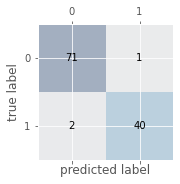

In [30]:
# 混淆矩阵：
# 加载数据
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",header=None)
'''
乳腺癌数据集：569个恶性和良性肿瘤细胞的样本，M为恶性，B为良性
'''
# 做基本的数据预处理
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,2:].values
y = df.iloc[:,1].values
le = LabelEncoder()    #将M-B等字符串编码成计算机能识别的0-1
y = le.fit_transform(y)
le.transform(['M','B'])
# 数据切分8：2
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

<Figure size 432x288 with 0 Axes>

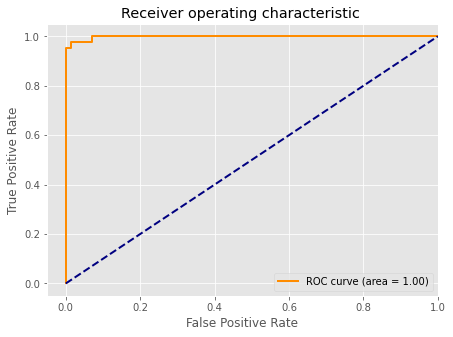

In [31]:
# 绘制ROC曲线：
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import make_scorer,f1_score
scorer = make_scorer(f1_score,pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring=scorer,cv=10)
y_pred = gs.fit(X_train,y_train).decision_function(X_test)
#y_pred = gs.predict(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_pred) ###计算真阳率和假阳率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假阳率为横坐标，真阳率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()


# 3.结语

本章中，我们重点讨论了各种回归和分类算法的具体推导与简单应用，并且给出了如何使用sklearn这个强大的python工具库进行简单的机器学习模型的建模代码。本章的重点是各个基础算法的掌握，包括回归和分类(重点是分类)算法以及怎么用网格搜索以及其他搜索方式进行调参。简单模型在进行复杂项目的时候往往显得力不从心，那么在下一章中，我们将开始本次开源项目的主题----集成学习，我们着重讨论如何将本章所学的基础模型进行集成，变成功能更加强大的集成模型。

为了巩固本章的理解，在这里给个小任务，大家结合sklearn的fetch_lfw_people数据集，进行一次实战。fetch_lfw_people数据集是一个图像数据集，详细内容可以参照：                   
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html                   
案例的内容是对图像进行识别并分类。               
参考资料：                
https://blog.csdn.net/cwlseu/article/details/52356665                      
https://blog.csdn.net/jasonzhoujx/article/details/81905923